In [ ]:
"I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching, or contributions during the production of this work."

'I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching, or contributions during the production of this work.'

#Reinforcement Learning Final Project - Saeyeon Hwang

reference: https://github.com/uoe-agents/pressureplate

## MARL Grid Environment

In [ ]:
import numpy as np
import gym
from gym import spaces
import copy
from copy import copy
import matplotlib.pyplot as plt
from google.colab import widgets

In [ ]:
class MAGridWorld(gym.Env):
    
    metadata = { 'render.modes' : ['human', 'rgb_array'] }
        
    def __init__(self, size, n_agents):
        self.size = size
        self._grid_size = (self.size, self.size)
        self.world = np.zeros((self._grid_size))
        self._timestep = None
        self._max_timestep = int(self.size*4)
        self.n_agents = n_agents
        self.dist = int((self.size-1)/(n_agents-1))
        self._step_cost = -0.1
        self.observation_space = spaces.Box(low=0, high=self.size, shape=(self.size, self.size))
        self.action_space = spaces.Discrete(5)

    def reset(self):
        self.agent_pos = []
        self.goal_pos = []
        self._timestep = 0
        self.done = [False for i in range(self.n_agents)] #agent 수 만큼 done개수 필요 
        for i in range(self.n_agents):
            self.agent_pos.append([self.size-1, i*self.dist])
            self.goal_pos.append([0, i*self.dist])
        self.goal_pos.reverse()
        observation = self.agent_pos
        return observation


    def _compute_distance(self, x, y):
        dist = np.abs(x[0]-y[0]) + np.abs(x[1]-y[1])
        return dist


    def _is_inside_grid(self, pos):
        return (0 <= pos[0] < self._grid_size[0]) and (0 <= pos[1] < self._grid_size[1])


    def _is_collision(self, new_pos, agent):
        for i in range(self.n_agents):
            if i == agent:
                continue
            elif new_pos == self.agent_pos[i]:
                return True
            elif new_pos == self.goal_pos[i]:
                return True

    def step(self, actions):
        self._timestep += 1
        old_pos = self.agent_pos.copy()
        rewards = [0 for _ in range(self.n_agents)]

        for i in range(self.n_agents):
            self.update_agent_pos(i, actions[i])
            old_dist = self._compute_distance(old_pos[i], self.goal_pos[i])
            new_dist = self._compute_distance(self.agent_pos[i], self.goal_pos[i])
            
            if new_dist < old_dist:
                rewards[i] = -0.1
            elif new_dist > old_dist:
                rewards[i] = -0.5

            elif (new_dist == old_dist) and not self.done[i]:
                rewards[i] = -0.5
            
            if (self.agent_pos[i] == self.goal_pos[i]):
                self.done[i] = True
                rewards[i] = 1
            else:
                self.done[i] = False

        if self._timestep >= self._max_timestep:
            self.done = [True for i in range(self.n_agents)]
            
        observation = self.agent_pos
        info = {}
        return observation, rewards, self.done, info #all(done)



    def update_agent_pos(self, agent, action):
        next_pos = copy(self.agent_pos[agent])
        if action == 0: # Down
            next_pos[0] += 1
        elif action == 1: # Up
            next_pos[0] -= 1
        elif action == 2: # Right
            next_pos[1] += 1
        elif action == 3: # Left
            next_pos[1] -= 1
        elif action == 4: # No move
            pass
        else:
            raise Exception('Action is not valid')
            
        if self._is_inside_grid(next_pos) and not self._is_collision(next_pos, agent):
            self.agent_pos[agent] = next_pos
        else:
            pass
        

    def render(self):
        state = np.copy(self.world)
        for i in range(self.n_agents):
            state[tuple(self.agent_pos[i])] = 1 - (0.1 * i)
            state[tuple(self.goal_pos[i])] = 1 - (0.1 * i)
        return plt.imshow(state)

In [ ]:
config = {
    'N_AGENTS': 2,
    'GRID_SIZE': 6
}

state [[5, 0], [5, 5]]
reward [-0.5, -0.5]
done [False, False]


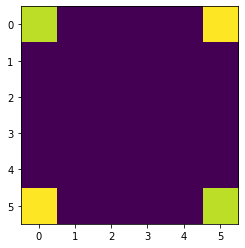

In [ ]:
if __name__ == '__main__':
    n_agents = config['N_AGENTS']
    size = config['GRID_SIZE']
    env = MAGridWorld(size=size, n_agents=n_agents)
    env.reset()
    env.render()
    action_n = [4,4]
    state, reward, done, _ = env.step(action_n)
    print('state', state)
    print('reward', reward)
    print('done', done)
    env.render()

In [ ]:
class RandomAgent:
    
    def __init__(self, env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space

    def step(self, observation):
        return [np.random.choice(self.action_space.n) for _ in range(6)]

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

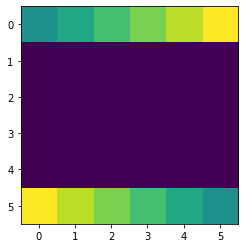

<IPython.core.display.Javascript object>

state [[4, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5]]
reward [-0.1, -0.5, -0.5, -0.5, -0.5, -0.5]
done [False, False, False, False, False, False]
state [[4, 1], [5, 1], [4, 2], [5, 3], [4, 4], [5, 5]]
reward [-0.1, -0.5, -0.1, -0.5, -0.1, -0.5]
done [False, False, False, False, False, False]
state [[4, 1], [5, 2], [4, 2], [5, 3], [4, 3], [5, 5]]
reward [-0.5, -0.1, -0.5, -0.5, -0.1, -0.5]
done [False, False, False, False, False, False]
state [[3, 1], [5, 2], [4, 1], [5, 3], [4, 2], [5, 5]]
reward [-0.1, -0.5, -0.5, -0.5, -0.1, -0.5]
done [False, False, False, False, False, False]
state [[2, 1], [5, 2], [3, 1], [5, 3], [4, 2], [5, 5]]
reward [-0.1, -0.5, -0.1, -0.5, -0.5, -0.5]
done [False, False, False, False, False, False]
state [[2, 1], [5, 2], [3, 1], [4, 3], [4, 2], [5, 5]]
reward [-0.5, -0.5, -0.5, -0.1, -0.5, -0.5]
done [False, False, False, False, False, False]
state [[2, 2], [5, 2], [3, 1], [4, 4], [4, 2], [5, 4]]
reward [-0.1, -0.5, -0.5, -0.5, -0.5, -0.1]
done [False, False,

In [ ]:
n_agents = config['N_AGENTS']
size = config['GRID_SIZE']
env = MAGridWorld(size=size,n_agents=n_agents)
agent = RandomAgent(env)

obs = env.reset()
done = False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

for i in range(100):
  action = agent.step(obs)
  state, reward, done, _ = env.step(action)
  print('state', state)
  print('reward', reward)
  print('done', done)

##Q Learning in MAGridWorld 

In [ ]:
config = {
    'N_AGENTS':2,
    'GRID_SIZE':6
}

In [ ]:
import numpy as np
import pandas as pd

rewards = []
epsilon_decay = []
episode_list = []

rewards1 = []
rewards2 = []

n_agents = config['N_AGENTS']
size = config['GRID_SIZE']
env = MAGridWorld(size=size,n_agents=n_agents)

observation_space = env.observation_space
action_space = env.action_space

Q1 = np.zeros([36,5]) #obs, action 
Q2 = np.zeros([36,5]) #obs, action 

obs = env.reset()
print('goal_pos', env.goal_pos)
print('agent_pos', obs)

epsilon=1
#repeat for each episode 
for ep in range(1000):
  
  #observe the initial state s 
  obs = env.reset()

  done = [False,False]
  epsilon = epsilon * 0.99
  
  cumulative_rewards = 0
  reward1 = 0
  reward2 = 0 
  #repeat for each step of episode
  for t in range(200):
    state = obs
    state1 = 6*obs[0][0] + obs[0][1]
    state2 = 6*obs[1][0] + obs[1][1]
    #select an action a from state s(e.g. epsilon-greedy) and execute it
    if np.random.random() < epsilon: 
      action = [np.random.choice(action_space.n) for _ in range(2)] #exploration 
    else:
      action1 = np.argmax(Q1[state1,:])
      action2 = np.argmax(Q2[state2,:])
      action = [action1, action2] #exploit

    #Receive immediate reward r, Observe the new state s'
    next_obs, reward, done, _ = env.step(action)
    
    #print('state', state)
    #print('reward', reward)
    #print('done', done)
    #print('------------')

    #Update the table entry for Q(s,a) as follows:
    next_state1 = 6*next_obs[0][0] + next_obs[0][1]
    next_state2 = 6*next_obs[1][0] + next_obs[1][1]

    Q1[state1,action[0]] = Q1[state1,action[0]] + (reward[0]+0.9*np.max(Q1[next_state1,:])-Q1[state1,action[0]])
    Q2[state2,action[1]] = Q2[state2,action[1]] + (reward[1]+0.9*np.max(Q2[next_state2,:])-Q2[state2,action[1]])
    #Q[state,action] = Q[state,action] + alpha*(reward + gamma*np.max(Q[next_state,:]) - Q[state,action])
    
    obs = next_obs

    sum_reward_agent = 0
    for i in reward:
      sum_reward_agent+=i
    cumulative_rewards += sum_reward_agent
    
    reward1 += reward[0]
    reward2 += reward[1]

    if done[0]==True and done[1]==True:
      #print(state)
      break 

  
  if (ep-1)%20 == 0:
    print("--------------------------------")  
    print('episode:',ep)  
    print('epsilon:',epsilon)
    print('rewards:',cumulative_rewards)
    print('timesteps:',t)
    
  episode_list.append(ep)
  epsilon_decay.append(epsilon)
  rewards.append(cumulative_rewards)
  rewards1.append(reward1)
  rewards2.append(reward2)
    

env.close()


goal_pos [[0, 5], [0, 0]]
agent_pos [[5, 0], [5, 5]]
--------------------------------
episode: 1
epsilon: 0.9801
rewards: -18.8
timesteps: 23
--------------------------------
episode: 21
epsilon: 0.8016305895390458
rewards: -14.399999999999999
timesteps: 23
--------------------------------
episode: 41
epsilon: 0.6556592205741436
rewards: -13.599999999999996
timesteps: 23
--------------------------------
episode: 61
epsilon: 0.536268225207185
rewards: -16.4
timesteps: 23
--------------------------------
episode: 81
epsilon: 0.4386175018099108
rewards: -0.9000000000000017
timesteps: 12
--------------------------------
episode: 101
epsilon: 0.358748297681892
rewards: -12.099999999999998
timesteps: 23
--------------------------------
episode: 121
epsilon: 0.29342272152521587
rewards: -13.999999999999998
timesteps: 23
--------------------------------
episode: 141
epsilon: 0.23999247958413436
rewards: -0.5000000000000009
timesteps: 12
--------------------------------
episode: 161
epsilon: 0.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

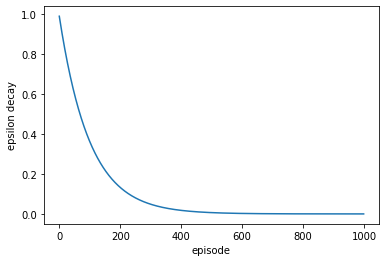

<IPython.core.display.Javascript object>

In [ ]:
#epsilon decay per episode 
with output_grid.output_to(0, 0):
  plt.plot(episode_list,epsilon_decay)
  plt.xlabel("episode")
  plt.ylabel("epsilon decay")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

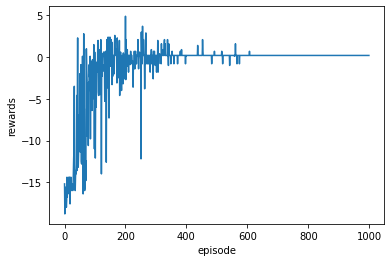

<IPython.core.display.Javascript object>

In [ ]:
#rewards per episode 
with output_grid.output_to(0, 0):
  plt.plot(episode_list,rewards)
  plt.xlabel("episode")
  plt.ylabel("rewards")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

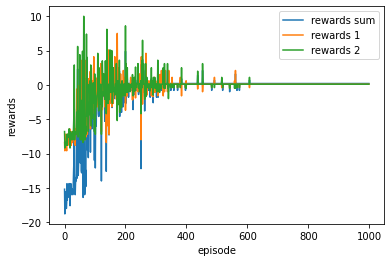

<IPython.core.display.Javascript object>

In [ ]:
#rewards per episode 
with output_grid.output_to(0, 0):
  plt.plot(episode_list,rewards,label='rewards sum')
  plt.plot(episode_list,rewards1,label='rewards 1')
  plt.plot(episode_list,rewards2, label='rewards 2')
  plt.xlabel("episode")
  plt.ylabel("rewards")
  plt.legend()

evaluation

In [ ]:
rewards = []
episode = []


#repeat for each episode 
for ep in range(10):

  #observe the initial state s 
  obs = env.reset()
  done = [False,False]
  
  cumulative_rewards = 0
  #repeat for each step of episode
  for t in range(200): 

    state1 = 6*obs[0][0] + obs[0][1]
    state2 = 6*obs[1][0] + obs[1][1]
    #select an action a from state s(e.g. epsilon-greedy) and execute it
    action1 = np.argmax(Q1[state1,:])
    action2 = np.argmax(Q2[state2,:])
    action = [action1, action2] #exploit

    #Receive immediate reward r, Observe the new state s'
    next_obs, reward, done, _ = env.step(action)
    
    #Update the table entry for Q(s,a) as follows:
    next_state1 = 6*next_obs[0][0]+ next_obs[0][1]
    next_state2 = 6*next_obs[1][0] + next_obs[1][1]
    Q1[state1,action1] = Q1[state1,action1] + (reward[0] + 0.9*np.max(Q1[next_state1,:]) - Q1[state1,action1])
    Q2[state2,action2] = Q2[state2,action2] + (reward[1] + 0.9*np.max(Q2[next_state2,:]) - Q2[state2,action2])
    
    for i in reward:
      cumulative_rewards += i
    obs = next_obs

    if done[0]==True and done[1]==True:
      break


  print("--------------------------------")  
  print('episode:',ep)  
  print('epsilon:',epsilon)
  print('rewards:',cumulative_rewards)
    
  episode.append(ep)
  rewards.append(cumulative_rewards)
  
  
env.close()

--------------------------------
episode: 0
epsilon: 4.317124741065784e-05
rewards: 0.1999999999999995
--------------------------------
episode: 1
epsilon: 4.317124741065784e-05
rewards: 0.1999999999999995
--------------------------------
episode: 2
epsilon: 4.317124741065784e-05
rewards: 0.1999999999999995
--------------------------------
episode: 3
epsilon: 4.317124741065784e-05
rewards: 0.1999999999999995
--------------------------------
episode: 4
epsilon: 4.317124741065784e-05
rewards: 0.1999999999999995
--------------------------------
episode: 5
epsilon: 4.317124741065784e-05
rewards: 0.1999999999999995
--------------------------------
episode: 6
epsilon: 4.317124741065784e-05
rewards: 0.1999999999999995
--------------------------------
episode: 7
epsilon: 4.317124741065784e-05
rewards: 0.1999999999999995
--------------------------------
episode: 8
epsilon: 4.317124741065784e-05
rewards: 0.1999999999999995
--------------------------------
episode: 9
epsilon: 4.317124741065784e-0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

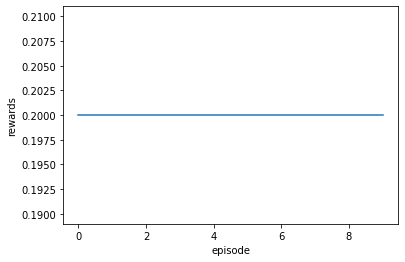

<IPython.core.display.Javascript object>

In [ ]:
#rewards per episode 
with output_grid.output_to(0, 0):
  plt.plot(episode,rewards)
  plt.xlabel("episode")
  plt.ylabel("rewards")

## Actor Critic in MAGrid World

In [ ]:
import random
import math
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch.nn.functional as F
from torch.distributions import Categorical

In [ ]:
config = {
    'N_AGENTS': 2,
    'GRID_SIZE': 6
}

In [ ]:
#Neural Network Model for Actor and Critic 
class ActorCritic(nn.Module):
  def __init__(self,obs_space,action_space):
    super(ActorCritic, self).__init__()
    self.obs_space = obs_space
    self.action_space = action_space
    self.linear = nn.Linear(self.obs_space,128)
    self.actor = nn.Linear(128,self.action_space)
    self.critic = nn.Linear(128,1)

  def Actor(self, state):
    output = F.relu(self.linear(state))
    output = F.softmax(self.actor(output))
    return output
  
  def Critic(self, state):
    output = F.relu(self.linear(state))
    output = self.critic(output)
    return output 

In [ ]:
from gym.core import RewardWrapper
#-----------------------------------------------#
n_agents = config['N_AGENTS']
size = config['GRID_SIZE']
env = MAGridWorld(size=size,n_agents=n_agents)
action_space = env.action_space.n

rewards = []
episode_list = []
rewards1 = []
rewards2 = []

obs = env.reset()
print('goal_pos', env.goal_pos)
print('agent_pos', obs)
#-----------------------------------------------#


ac1 = ActorCritic(36, action_space)
optimizer1 = optim.Adam(ac1.parameters(),3e-4)

ac2 = ActorCritic(36, action_space)
optimizer2 = optim.Adam(ac2.parameters(),3e-4)

for ep in range(1000): #for each episode
  
  #Initialize S
  obs = env.reset()

  loss1 = 0
  loss2 = 0 
  cumulative_rewards = 0
  reward1 = 0
  reward2 = 0 
  
  for t in range(100): #for each timesteps
    state = obs 
    state1 = torch.zeros([1,36])
    integer_1 = 6*state[0][0] + state[0][1]
    state1[0,integer_1] = 1

    integer_2 = 6*state[1][0] + state[1][1]
    state2 = torch.zeros([1,36])
    state2[0,integer_2] = 1

    #Take action A, observe S', R 
    probs1 = ac1.Actor(state1)
    m1 = Categorical(probs1)
    action1 = m1.sample()


    probs2 = ac2.Actor(state2)
    m2 = Categorical(probs2)
    action2 = m2.sample()


    next_obs, reward, done, _ = env.step([action1,action2])

    
    #advantage function = TD error
    #a <- R + gamma * v(S',w) - v(S,w)
    next_state = next_obs
    integer_1 = 6*next_state[0][0] + next_state[0][1]
    next_state1 = torch.zeros([1,36])
    next_state1[0,integer_1] = 1

    value1 = ac1.Critic(state1)
    next_value1 = ac1.Critic(next_state1)

    integer_2 = 6*next_state[1][0] + next_state[1][1]
    next_state2 = torch.zeros([1,36])
    next_state2[0,integer_2] = 1

    value2 = ac2.Critic(state2)
    next_value2 = ac2.Critic(next_state2)


    target1 = torch.tensor(reward[0]) + 0.9 * next_value1
    target2 = torch.tensor(reward[1]) + 0.9 * next_value2
    if done[0] == True :
      target1 = torch.tensor(reward[0])
    if done[1] == True:
      target2 = torch.tensor(reward[1])


    #update critic by minimizing loss
    lossC1 = F.smooth_l1_loss(target1, value1)
    lossC2 = F.smooth_l1_loss(target2, value2)

    #update actor by minimizing loss
    lossA1 = -m1.log_prob(action1) * (target1 - value1)
    loss1 += lossC1 + lossA1.sum()

    lossA2 = -m2.log_prob(action2) * (target2 - value2)
    loss2 += lossC2 + lossA2.sum()

    #S<-S'
    obs = next_obs

    #compute comulative reward 
    sum_reward_agent = 0
    for i in reward:
      sum_reward_agent+=i
    reward1 += reward[0]
    reward2 += reward[1]
    cumulative_rewards += sum_reward_agent

    if done[0] == True and done[1] == True:
      print(state)
      break 


  #backpropagation 
  optimizer1.zero_grad()
  optimizer2.zero_grad()  
  
  loss1.backward()
  loss2.backward()
  
  optimizer1.step()
  optimizer2.step()

  if (ep)%10== 0 : 
    print('episode:',ep,end=' ')
    print('rewards:',cumulative_rewards)

  episode_list.append(ep)
  rewards.append(cumulative_rewards)
  rewards1.append(reward1)
  rewards2.append(reward2)

env.close()

goal_pos [[0, 5], [0, 0]]
agent_pos [[5, 0], [5, 5]]
[[2, 0], [1, 2]]
episode: 0 rewards: -16.399999999999995
[[4, 1], [5, 2]]
[[3, 3], [3, 4]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


[[2, 0], [3, 0]]
[[0, 1], [1, 4]]
[[3, 4], [2, 2]]
[[4, 1], [2, 5]]
[[4, 3], [5, 4]]
[[4, 0], [3, 1]]
[[3, 1], [5, 3]]
[[1, 4], [4, 1]]
episode: 10 rewards: -13.999999999999996
[[3, 2], [4, 3]]
[[1, 1], [1, 5]]
[[2, 0], [1, 5]]
[[5, 0], [3, 5]]
[[3, 0], [5, 0]]
[[0, 1], [1, 1]]
[[5, 0], [5, 3]]
[[5, 0], [5, 4]]
[[4, 1], [1, 2]]
[[4, 3], [2, 3]]
episode: 20 rewards: -15.599999999999998
[[2, 1], [2, 3]]
[[3, 0], [1, 4]]
[[1, 2], [1, 4]]
[[5, 4], [5, 5]]
[[1, 3], [5, 5]]
[[2, 0], [5, 2]]
[[0, 4], [2, 0]]
[[5, 1], [3, 4]]
[[3, 0], [5, 5]]
[[2, 4], [3, 2]]
episode: 30 rewards: -13.599999999999996
[[5, 1], [4, 0]]
[[3, 3], [2, 4]]
[[3, 2], [3, 4]]
[[3, 1], [5, 2]]
[[3, 1], [4, 5]]
[[1, 1], [1, 0]]
[[3, 1], [4, 5]]
[[5, 0], [3, 4]]
[[0, 3], [5, 1]]
[[3, 2], [1, 4]]
episode: 40 rewards: -15.999999999999995
[[4, 4], [4, 1]]
[[4, 3], [2, 4]]
[[4, 3], [2, 0]]
[[0, 2], [5, 2]]
[[3, 3], [1, 4]]
[[4, 3], [5, 2]]
[[1, 0], [5, 2]]
[[4, 3], [4, 5]]
[[1, 3], [5, 2]]
[[4, 2], [4, 4]]
episode: 50 rewards:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

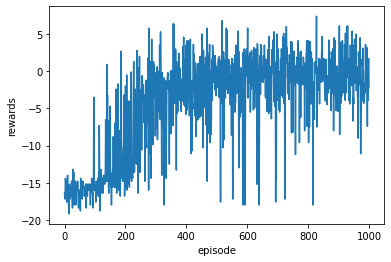

<IPython.core.display.Javascript object>

In [ ]:
#rewards per episode 
with output_grid.output_to(0, 0):
  plt.plot(episode_list,rewards)
  plt.xlabel("episode")
  plt.ylabel("rewards")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

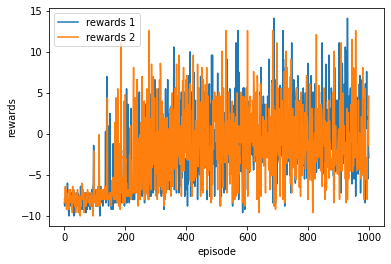

<IPython.core.display.Javascript object>

In [ ]:
#rewards per episode 
with output_grid.output_to(0, 0):
  plt.plot(episode_list,rewards1,label='rewards 1')
  plt.plot(episode_list,rewards2, label='rewards 2')
  plt.xlabel("episode")
  plt.ylabel("rewards")
  plt.legend()

In [ ]:
ev_result = []
ev_ep = []
episode = 10

for ep in range (1,episode+1):
  state= env.reset()
  done = False
  cumulative_rewards = 0 
  rewards1=0
  rewards2=0
  for t in range(200):

    integer_1 = 6*state[0][0] + state[0][1]
    state1 = torch.zeros([1,36])
    state1[0,integer_1] = 1

    integer_2 = 6*state[1][0] + state[1][1]
    state2 = torch.zeros([1,36])
    state2[0,integer_2] = 1
    
    probs1 = ac1.Actor(state1)
    prob1 = []
    probs2 = ac2.Actor(state2)
    prob2 = []
    
    prob1.append(np.argmax(probs1.detach()))
    prob2.append(np.argmax(probs2.detach()))
    
    action1 = torch.tensor(prob1)
    action2 = torch.tensor(prob2)

    next_state, reward, done, _ = env.step([action1,action2])

    sum_reward_agent = 0
    for i in reward:
      sum_reward_agent+=i
    cumulative_rewards += sum_reward_agent
    rewards1+=reward[0]
    rewards2+=reward[1]
    
    state = next_state

    if done[0] == True and done[1]==True:
      break 
  
  print("--------------------------------")  
  print('episode:',ep)
  print('rewards:',cumulative_rewards)

      
  ev_ep.append(ep)
  ev_result.append(cumulative_rewards)

--------------------------------
episode: 1
rewards: -22.4
--------------------------------
episode: 2
rewards: -22.4
--------------------------------
episode: 3
rewards: -22.4
--------------------------------
episode: 4
rewards: -22.4
--------------------------------
episode: 5
rewards: -22.4
--------------------------------
episode: 6
rewards: -22.4
--------------------------------
episode: 7
rewards: -22.4
--------------------------------
episode: 8
rewards: -22.4
--------------------------------
episode: 9
rewards: -22.4
--------------------------------
episode: 10
rewards: -22.4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


##Multi Agent Environment - Pressure Plate

### Install 

In [1]:
!git clone https://github.com/uoe-agents/pressureplate.git
%cd /content/pressureplate/
!pip install -e .

fatal: destination path 'pressureplate' already exists and is not an empty directory.
/content/pressureplate
Obtaining file:///content/pressureplate
  Using cached pyglet-1.5.0-py2.py3-none-any.whl (1.0 MB)
  Attempting uninstall: pyglet
    Found existing installation: pyglet 1.5.11
    Uninstalling pyglet-1.5.11:
      Successfully uninstalled pyglet-1.5.11
  Attempting uninstall: pressureplate
    Found existing installation: pressureplate 0.0.1
    Can't uninstall 'pressureplate'. No files were found to uninstall.
  Running setup.py develop for pressureplate


video

In [2]:
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [3]:
import gym
import matplotlib.pyplot as plt
from gym import wrappers
%matplotlib inline

In [4]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [5]:
!pip install bash

In [6]:
# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [7]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) # error only


import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [8]:
!pip install pyglet==1.5.11

  Using cached pyglet-1.5.11-py3-none-any.whl (1.1 MB)
  Attempting uninstall: pyglet
    Found existing installation: pyglet 1.5.0
    Uninstalling pyglet-1.5.0:
      Successfully uninstalled pyglet-1.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires pyglet<=1.5.0,>=1.4.0, but you have pyglet 1.5.11 which is incompatible.


In [9]:
import pressureplate
import numpy as np
import pandas as pd
from IPython import display as ipythondisplay
from PIL import Image
from pyvirtualdisplay import Display

### Q-learning

In [ ]:
# Render an episode and save as a GIF file
display = Display(visible=0, size=(400, 300))
display.start()

env = gym.make('pressureplate-linear-4p-v0')

rewards = []
epsilon_decay = []
episode_list = []

rewards1 = []
rewards2 = []
rewards3 = []
rewards4 = []

Q1 = np.zeros([15*9,5]) #obs, action 
Q2 = np.zeros([15*9,5]) 
Q3 = np.zeros([15*9,5])
Q4 = np.zeros([15*9,5])


epsilon=1

env.reset()
screen = env.render(mode='rgb_array')
im = Image.fromarray(screen)
images = [im]


#repeat for each episode 
for ep in range(1000):
  
  #observe the initial state s 
  obs = env.reset()
  epsilon = epsilon * 0.99
  
  cumulative_rewards = 0
  reward1 = 0
  reward2 = 0 
  reward3 = 0
  reward4 = 0 

  #repeat for each step of episode
  for t in range(200):
    state = obs
    state1 = int(9*obs[0][-1] + obs[0][-2])
    state2 = int(9*obs[1][-1] + obs[1][-2]) 
    state3 = int(9*obs[2][-1] + obs[2][-2])
    state4 = int(9*obs[3][-1] + obs[3][-2])
    #select an action a from state s(e.g. epsilon-greedy) and execute it
    if np.random.random() < epsilon: 
      action = [np.random.choice(5) for _ in range(4)] #exploration 
    else:
      action1 = np.argmax(Q1[state1,:])
      action2 = np.argmax(Q2[state2,:])
      action3 = np.argmax(Q3[state3,:])
      action4 = np.argmax(Q4[state4,:])
      action = [action1, action2, action3, action4] #exploit

    #Receive immediate reward r, Observe the new state s'
    next_obs, reward, done, _ = env.step(action)
        
    #Update the table entry for Q(s,a) as follows:
    next_state1 = int(9*next_obs[0][-1] + next_obs[0][-2])
    next_state2 = int(9*next_obs[1][-1] + next_obs[1][-2])
    next_state3 = int(9*next_obs[2][-1] + next_obs[2][-2])
    next_state4 = int(9*next_obs[3][-1] + next_obs[3][-2])

    if done[0] == False:
      Q1[state1,action[0]] = Q1[state1,action[0]] + (reward[0]+0.9*np.max(Q1[next_state1,:])-Q1[state1,action[0]])
    if done[1] == False:
      Q2[state2,action[1]] = Q2[state2,action[1]] + (reward[1]+0.9*np.max(Q2[next_state2,:])-Q2[state2,action[1]])
    if done[2] == False:
      Q3[state3,action[2]] = Q3[state3,action[2]] + (reward[2]+0.9*np.max(Q3[next_state3,:])-Q3[state3,action[2]])
    if done[3] == False:
      Q4[state4,action[3]] = Q4[state4,action[3]] + (reward[3]+0.9*np.max(Q4[next_state4,:])-Q4[state4,action[3]])
    #Q[state,action] = Q[state,action] + alpha*(reward + gamma*np.max(Q[next_state,:]) - Q[state,action])
    
    obs = next_obs

    sum_reward_agent = 0
    for i in reward:
      sum_reward_agent+=i
    cumulative_rewards += sum_reward_agent
    
    reward1 += reward[0]
    reward2 += reward[1]
    reward3 += reward[2]
    reward4 += reward[3]

    if ep == 999:
      if t % 1 == 0:
        screen = env.render(mode='rgb_array')
        images.append(Image.fromarray(screen))

    if done[0]==True and done[1]==True and done[2]==True and done[3]==True:
      break 

  
  if (ep-1)%20 == 0:
    print("--------------------------------")  
    print('episode:',ep)  
    print('epsilon:',epsilon)
    print('rewards:',cumulative_rewards)
    
  episode_list.append(ep)
  epsilon_decay.append(epsilon)
  rewards.append(cumulative_rewards)
  rewards1.append(reward1)
  rewards2.append(reward2)
  rewards3.append(reward3)
  rewards4.append(reward4)
    

env.close()



# Save GIF image
image_file = 'q-learning-pressureplate-linear-4p-v0.gif'
# loop=0: loop forever, duration=1: play each frame for 1ms
images[0].save(
    image_file, save_all=True, append_images=images[1:], loop=0, duration=1)


--------------------------------
episode: 1
epsilon: 0.9801
rewards: -1841.9
--------------------------------
episode: 21
epsilon: 0.8016305895390458
rewards: -1327.8000000000006
--------------------------------
episode: 41
epsilon: 0.6556592205741436
rewards: -1095.6000000000004
--------------------------------
episode: 61
epsilon: 0.536268225207185
rewards: -550.3000000000001
--------------------------------
episode: 81
epsilon: 0.4386175018099108
rewards: -587.9000000000002
--------------------------------
episode: 101
epsilon: 0.358748297681892
rewards: -318.9000000000001
--------------------------------
episode: 121
epsilon: 0.29342272152521587
rewards: -208.29999999999998
--------------------------------
episode: 141
epsilon: 0.23999247958413436
rewards: -201.69999999999996
--------------------------------
episode: 161
epsilon: 0.1962915140230253
rewards: -265.0
--------------------------------
episode: 181
epsilon: 0.1605481911108965
rewards: -184.59999999999997
----------------

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

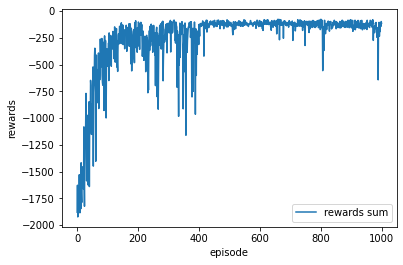

<IPython.core.display.Javascript object>

In [ ]:
#rewards per episode 
output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  plt.plot(episode_list,rewards,label='rewards sum')
  plt.xlabel("episode")
  plt.ylabel("rewards")
  plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

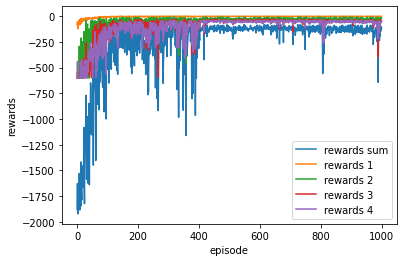

<IPython.core.display.Javascript object>

In [ ]:
#rewards per episode 
with output_grid.output_to(0, 0):
  plt.plot(episode_list,rewards,label='rewards sum')
  plt.plot(episode_list,rewards1,label='rewards 1')
  plt.plot(episode_list,rewards2, label='rewards 2')
  plt.plot(episode_list,rewards3,label='rewards 3')
  plt.plot(episode_list,rewards4,label='rewards 4')
  plt.xlabel("episode")
  plt.ylabel("rewards")
  plt.legend()

###Actor-Critic

In [10]:
import random
import math
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch.nn.functional as F
from torch.distributions import Categorical

In [11]:
import numpy as np
import gym
from gym import spaces
import copy
from copy import copy
import matplotlib.pyplot as plt
from google.colab import widgets

In [12]:
#Neural Network Model for Actor and Critic 
class ActorCritic(nn.Module):
  def __init__(self,obs_space,action_space):
    super(ActorCritic, self).__init__()
    self.obs_space = obs_space
    self.action_space = action_space
    self.linear = nn.Linear(self.obs_space,128)
    self.actor = nn.Linear(128,self.action_space)
    self.critic = nn.Linear(128,1)

  def Actor(self, state):
    output = F.relu(self.linear(state))
    output = F.softmax(self.actor(output))
    return output
  
  def Critic(self, state):
    output = F.relu(self.linear(state))
    output = self.critic(output)
    return output 

  def state_one_hot(self,state):
    onehot = torch.zeros(1,15*9)
    pos = 9*state[-1] + state[-2]
    onehot[0,int(pos)] = 1
    return onehot
  
  def action(self,state):
    probs = self.Actor(state)
    m = Categorical(probs)
    action = m.sample()
    return m, action

  def Loss(self,state,done,reward,next_state,m,action,loss):
    value =  self.Critic(state)
    target = torch.tensor(reward) + 0.9 * self.Critic(next_state)
    if done:
      target = torch.tensor(reward)
    lossC = (target-value).pow(2)
    lossA = -m.log_prob(action) * (target - value)
    loss += lossC + lossA.mean()
    return loss 


In [ ]:
from gym.core import RewardWrapper
#-----------------------------------------------#
env = gym.make('pressureplate-linear-4p-v0')

rewards = []
episode_list = []
rewards1 = []
rewards2 = []
rewards3 = []
rewards4 = []

# Render an episode and save as a GIF file
display = Display(visible=0, size=(400, 300))
display.start()
env.reset()
screen = env.render(mode='rgb_array')
im = Image.fromarray(screen)
images = [im]
#-----------------------------------------------#

ac1 = ActorCritic(9*15, 5) #obs, action_space
optimizer1 = optim.Adam(ac1.parameters())

ac2 = ActorCritic(9*15, 5)
optimizer2 = optim.Adam(ac2.parameters())

ac3 = ActorCritic(9*15, 5)
optimizer3 = optim.Adam(ac3.parameters())

ac4 = ActorCritic(9*15, 5)
optimizer4 = optim.Adam(ac4.parameters())

for ep in range(500): #for each episode
  
  #Initialize S
  obs = env.reset()
  loss1 = 0
  loss2 = 0 
  loss3 = 0
  loss4 = 0 
  cumulative_rewards = 0
  reward1 = 0
  reward2 = 0 
  reward3 = 0
  reward4 = 0 
  
  for t in range(200): #for each timesteps
    state = obs 
    state1 = ac1.state_one_hot(state[0])
    state2 = ac2.state_one_hot(state[1])
    state3 = ac3.state_one_hot(state[2])
    state4 = ac4.state_one_hot(state[3])

    #Take action A, observe S', R 
    m1,action1 = ac1.action(state1)
    m2,action2 = ac2.action(state2)
    m3,action3 = ac3.action(state3)
    m4,action4 = ac4.action(state4)

    next_obs, reward, done, _ = env.step([action1,action2,action3,action4])

    #advantage function = TD error
    #a <- R + gamma * v(S',w) - v(S,w)
    next_state = next_obs

    next_state1 = ac1.state_one_hot(next_state[0])
    next_state2 = ac2.state_one_hot(next_state[1])
    next_state3 = ac3.state_one_hot(next_state[2])
    next_state4 = ac4.state_one_hot(next_state[3])

    #update critic by minimizing loss
    #update actor by minimizing loss
    loss1 = ac1.Loss(state1,done[0],reward[0],next_state1,m1,action1,loss1)
    loss2 = ac2.Loss(state2,done[1],reward[1],next_state2,m2,action2,loss2)
    loss3 = ac3.Loss(state3,done[2],reward[2],next_state3,m3,action3,loss3)
    loss4 = ac4.Loss(state1,done[3],reward[3],next_state4,m4,action4,loss4)

    #S<-S'
    obs = next_obs

    #compute comulative reward 
    sum_reward_agent = 0
    for i in reward:
      sum_reward_agent+=i
    reward1 += reward[0]
    reward2 += reward[1]
    reward3 += reward[2]
    reward4 += reward[3]
    cumulative_rewards += sum_reward_agent

    # Render screen every 10 steps when episode arrives at 1000
    if ep ==499:
      if t % 1 == 0:
        screen = env.render(mode='rgb_array')
        images.append(Image.fromarray(screen))

    if done[0] == True and done[1] == True and done[2] == True and done[3] == True:
      print(t)
      break 


  #backpropagation 

  optimizer1.zero_grad()
  loss1.backward()
  optimizer1.step()
  
  optimizer2.zero_grad()
  loss2.backward()
  optimizer2.step()
  
  optimizer3.zero_grad()
  loss3.backward()  
  optimizer3.step()
  
  optimizer4.zero_grad()
  loss4.backward()
  optimizer4.step()

  if (ep-1)%10 == 0:
    print('episode:',ep,end=' ')
    print('rewards:',cumulative_rewards)

  episode_list.append(ep)
  rewards.append(cumulative_rewards)
  rewards1.append(reward1)
  rewards2.append(reward2)
  rewards3.append(reward3)
  rewards4.append(reward4)

env.close()

# Save GIF image
image_file = 'actor-critic-pressureplate-linear-4p-v0.gif'
# loop=0: loop forever, duration=1: play each frame for 1ms
images[0].save(
    image_file, save_all=True, append_images=images[1:], loop=0, duration=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


episode: 1 rewards: -1883.3000000000002


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

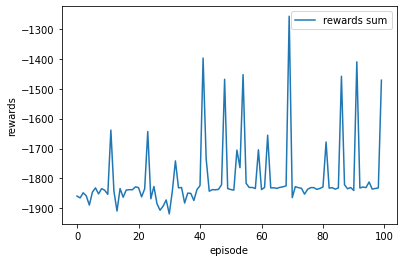

<IPython.core.display.Javascript object>

In [93]:
#rewards per episode 
output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  plt.plot(episode_list,rewards,label='rewards sum')
  plt.xlabel("episode")
  plt.ylabel("rewards")
  plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

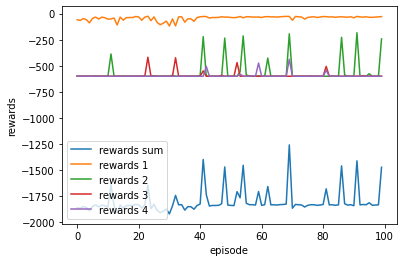

<IPython.core.display.Javascript object>

In [94]:
#rewards per episode 
with output_grid.output_to(0, 0):
  plt.plot(episode_list,rewards,label='rewards sum')
  plt.plot(episode_list,rewards1,label='rewards 1')
  plt.plot(episode_list,rewards2, label='rewards 2')
  plt.plot(episode_list,rewards3,label='rewards 3')
  plt.plot(episode_list,rewards4,label='rewards 4')
  plt.xlabel("episode")
  plt.ylabel("rewards")
  plt.legend()